In [1]:


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%run squeezenet_architecture.ipynb 

datasets = tf.keras.datasets
layers =  tf.keras.layers
models = tf.keras.models
losses = tf.keras.losses
optimizers = tf.keras.optimizers 
metrics = tf.keras.metrics
preprocessing_image = tf.keras.preprocessing.image
utils = tf.keras.utils


Model: "squeezenet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv (Conv2D)       │ (None, 15, 15,    │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ relu_conv1          │ (None, 15, 15,    │          0 │ conv[0][0]        │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 7, 7, 64)  │          0 │ relu_conv1[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire2_squeeze1x1    │ (None, 7, 7, 16)  │      1,040 │ pool1[0][0]       │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire2_relu.squeeze… │ (None, 7, 7, 16)  │          0 │ fire2_squeeze1x1… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire2_expand1x1     │ (None, 7, 7, 64)  │      1,088 │ fire2_relu.squee… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire2_expand3x3     │ (None, 7, 7, 64)  │      9,280 │ fire2_relu.squee… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire2_relu.expand1… │ (None, 7, 7, 64)  │          0 │ fire2_expand1x1[… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire2_relu.expand3… │ (None, 7, 7, 64)  │          0 │ fire2_expand3x3[… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire2_concat        │ (None, 7, 7, 128) │          0 │ fire2_relu.expan… │
│ (Concatenate)       │                   │            │ fire2_relu.expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire3_squeeze1x1    │ (None, 7, 7, 16)  │      2,064 │ fire2_concat[0][… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire3_relu.squeeze… │ (None, 7, 7, 16)  │          0 │ fire3_squeeze1x1… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire3_expand1x1     │ (None, 7, 7, 64)  │      1,088 │ fire3_relu.squee… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire3_expand3x3     │ (None, 7, 7, 64)  │      9,280 │ fire3_relu.squee… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire3_relu.expand1… │ (None, 7, 7, 64)  │          0 │ fire3_expand1x1[… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire3_relu.expand3… │ (None, 7, 7, 64)  │          0 │ fire3_expand3x3[

 Total params: 122,986 (480.41 KB)

 Trainable params: 122,986 (480.41 KB)

 Non-trainable params: 0 (0.00 B)

In [2]:

(x_train, y_train), (x_test, y_test)= datasets.cifar10.load_data()


In [3]:

y_train = utils.to_categorical(y_train, num_classes = 10)
y_test = utils.to_categorical(y_test, num_classes = 10)


train_data_gen = preprocessing_image.ImageDataGenerator(
    rescale = 1/255,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip=True)

test_data_gen = preprocessing_image.ImageDataGenerator(rescale = 1/255)


train_generator = train_data_gen.flow(x = x_train, y = y_train, batch_size = 32, shuffle = True) 
test_generator = train_data_gen.flow(x = x_test, y = y_test, batch_size = 32, shuffle = True)

In [10]:

def compile_squeeze(model):
    loss = losses.categorical_crossentropy
    
    metric = [metrics.categorical_accuracy]
    optimizer = optimizers.Adam(learning_rate=0.001)   
    model.compile(optimizer=optimizer, loss=loss, metrics=metric)
    return model    

In [11]:
# compile the model

squeezeNet = SqueezeNet()
squeezeNet = compile_squeeze(squeezeNet)

In [14]:
#reinforcement 2 lan
training = squeezeNet.fit(
    train_generator,
    steps_per_epoch=400,
    epochs=50,
    validation_data=test_generator,
    validation_steps=200)


Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - categorical_accuracy: 0.7008 - loss: 0.8610 - val_categorical_accuracy: 0.6947 - val_loss: 0.8893
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - categorical_accuracy: 0.6918 - loss: 0.8587 - val_categorical_accuracy: 0.6706 - val_loss: 0.9145
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - categorical_accuracy: 0.7061 - loss: 0.8570 - val_categorical_accuracy: 0.6750 - val_loss: 0.9238
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - categorical_accuracy: 0.7088 - loss: 0.8376 - val_categorical_accuracy: 0.6917 - val_loss: 0.8800
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - categorical_accuracy: 0.7071 - loss: 0.8409 - val_categorical_accuracy: 0.6925 - val_loss: 0.8931
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - categorical_accuracy: 0.7024 - loss: 0.8545 - val_categorical_accuracy: 0.6814 - val_loss: 0.9143
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - categorical_accuracy

KeyboardInterrupt: 

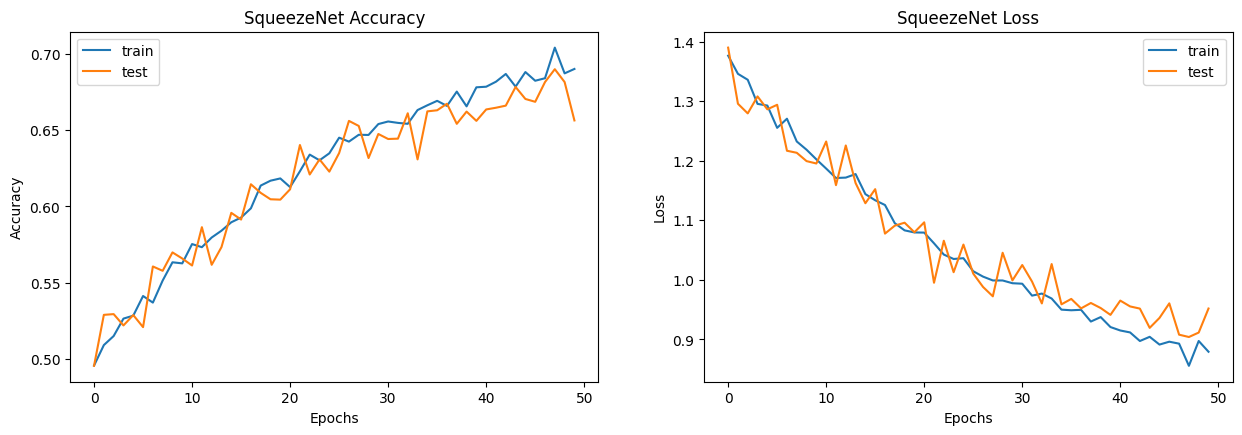

In [15]:
def plot_accuracy_and_loss(training):
    plt.figure(1, figsize= (15, 10))
    
    # plot train and test accuracy
    plt.subplot(221)
    plt.plot(training.history['categorical_accuracy'])
    plt.plot(training.history['val_categorical_accuracy'])
    plt.title('SqueezeNet Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train', 'test'], loc='upper left')

    # plot train and test loss
    plt.subplot(222)
    plt.plot(training.history['loss'])
    plt.plot(training.history['val_loss'])
    plt.title('SqueezeNet Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['train', 'test'], loc='upper right')
    
    plt.show()
    
plot_accuracy_and_loss(training)

In [17]:
# save model architecture
model_json = squeezeNet.to_json()
open('models/squeeze_net.json', 'w').write(model_json)

# save model's learned weights
squeezeNet.save_weights('models/squeeze_net.weights.h5', overwrite=True)